# Factorization 

**Note:** Part of this notebook is used in combination with Blender to create a 3D "slicing" animation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from AK_animation_utils import *
import cmasher

## Creating the two marginal distbutions

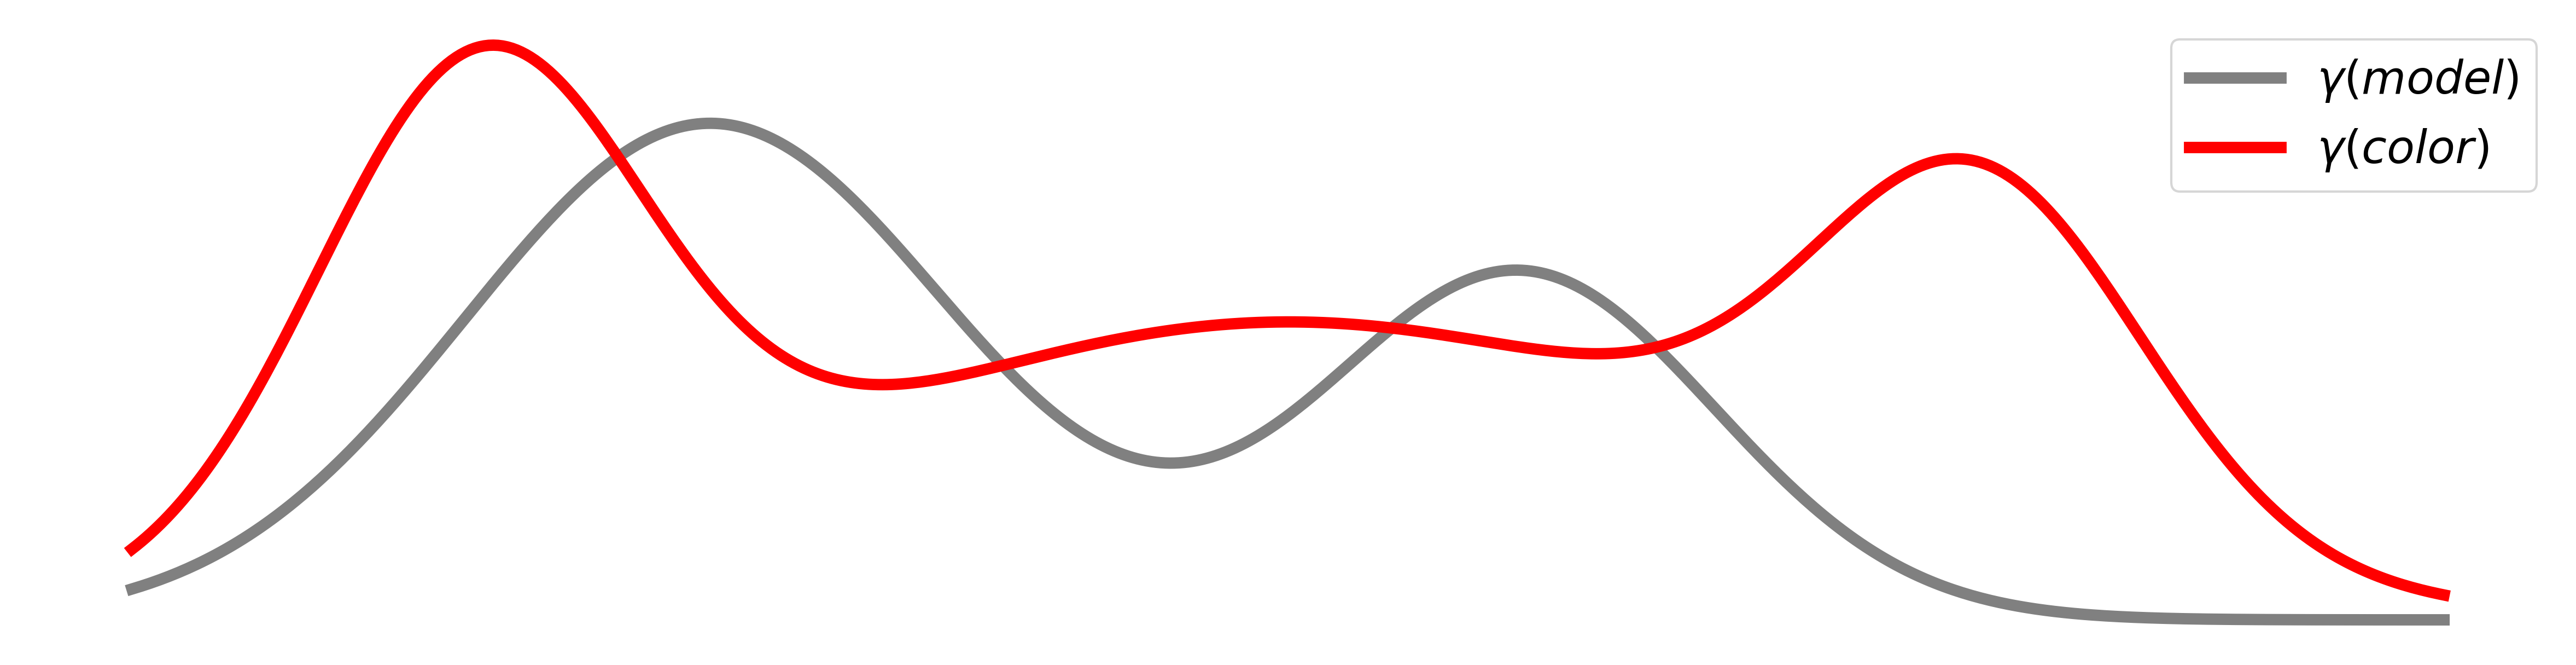

In [14]:
def gauss(x,mu,sigma):
    return np.exp(-(x-mu)**2/(sigma**2))

x = np.linspace(0,1,500)
dist_model = gauss(x,0.25,0.15) + gauss(x,0.6,0.12)*0.7
dist_color = 0.6*gauss(x,0.5,0.3)+ gauss(x,0.15,0.1)+ gauss(x,0.8,0.1)*0.7

plt.figure(figsize=(20,5),dpi=300)
plt.axis(False)
plt.plot(x,dist_model, lw=5, label="$\gamma(model)$", color="gray")
plt.plot(x,dist_color, lw=5, label="$\gamma(color)$", color="red")
plt.legend(fontsize=20)

## Let's animate them!

<table>
    <tr>
      <td>
        <video width="1000" height=" " src="assets/1D Color distribution - curve.mp4"controls autoplay muted> </video>
      </td>
        <td>
        <video width="1000" height=" " src="assets/1D Color distribution - fill.mp4"controls autoplay muted> </video>
      </td>
     </tr>
    <tr>
      <td>
        <video width="1000" height=" " src="assets/1D Model distribution - curve.mp4"controls autoplay muted> </video>
      </td>
        <td>
        <video width="1000" height=" " src="assets/1D Model distribution - fill.mp4"controls autoplay muted> </video>
      </td>
     </tr>
</table>



In [8]:
# This function will be called every time we want to create an animation to set up figure and axis
def setup_axes():
    fig,ax = fig, ax = plt.subplots(1,1,figsize=(20,5),dpi=300)
    fig.set_facecolor("black")
    ax.set_facecolor("black")
    ax.set_ylim(-0.1,1.2)
    ax.set_xlim(0,1)
    return fig,ax

## Curve animations

**Note:** I'm animating the curves and the fills below them for each case as separate files for finer control over color and transparency and After Effects.

(Because the animations have a black background, they can be ealisy composed together by setting the Blending Mode to `Screen` in AE)

In [ ]:
#---  Color distribution
fig, ax = setup_axes()

lc = get_gradient_curve(x, dist_color, zorder=3)
ax.add_collection(lc)
animation = animate_line_collections([lc],fig)
animation.save("assets/1D Color distribution - curve.mp4")


# --- Model distribution
fig, ax = setup_axes()

line = ax.plot(x, dist_model, lw=10, solid_capstyle="round", color="white")[0]
animation = animate_lines([line],fig)
animation.save("assets/1D Model distribution - curve.mp4")

## Fill animations

**Note:** the resulting fill for the `Color` distrubtion will be white (unlike the corresponding curve animation, which is gradient).

This is because right now I don't know how to create beautiful gradient fills in `matplotlib`. As a workaround, I add the gradient coloring post-hoc in After Effects

In [ ]:

# --- Color distribution
fig, ax = setup_axes()
fill,fill_animation = get_animated_fill(x,dist_color, fig, ax) 
fill_animation.save("assets/1D Color distribution - fill.mp4") # 



# --- Model distribution
fig, ax = setup_axes()
fill,fill_animation = get_animated_fill(x,dist_model, fig, ax)
fill_animation.save("assets/1D Model distribution - fill.mp4")


## Bringing 3D data to Blender

Now, the logic for creating the surface in Blender is as follows:

1) Here in Python we will create a 2D array as an outer product of the two marginal distributions. This would be essentially the `Z` coordinates (height profile) of the surface

<center> <img src="assets/Displacement map.png" width=200> </center>


2) Save the resulting array as black and white image, where white parts would correspond to the most elevated areas (highest `Z`)

3) In Blender create a grid and apply a [Displace modifier](https://docs.blender.org/manual/en/latest/modeling/modifiers/deform/displace.html), specifying our saved image as a displacement map. This will generate a 3D surface object

<center> <img src="assets/Blender surface.png" width=500> </center>

4) Using Shader Nodes create a material that would "slice" this object depending on the position of some Empty object. This technique was inspired by [this video](https://youtu.be/9d1T9VEOkAk). 


<center> <img src="assets/Blender shader nodes.png" width=1000> </center>

5) To make the second half of the sliced surface appear wireframe, duplicate the Mesh, apply the [Wireframe modifier](https://docs.blender.org/manual/en/latest/modeling/modifiers/generate/wireframe.html) and modify the Material on the wireframe object to reverse the transparency logic.


6) Animate the position of the Empty object to create the slicing animation


<center> <video width="800" height=" " 
       src="assets/Slicing distribution.mov"  
       controls autoplay muted>
</video> </center>

✨✨✨ The `.blend` file with the animation and shaders can be found in `Blender files/Factorizing 2D distribution.blend` ✨✨✨

In [ ]:
# Creating the displacement map

fig, ax = plt.subplots(1,1, figsize=(10,10),dpi=300)
ax.axis(False)
matrix = np.outer(dist_color, dist_model)
plt.imshow(matrix, origin="lower", cmap="binary_r")
plt.imsave("assets/Displacement map.png",matrix,cmap="binary_r", origin="lower", dpi=300)